In [95]:
import os

# Get the current directory
current_directory = os.getcwd()

# List all files in the current directory
files_in_directory = os.listdir(current_directory)

# Print the list of files
print(files_in_directory)

['LoanDefault.ipynb', '.ipynb_checkpoints', 'LoanData_Preprocessed_v1.2.csv']


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [99]:
# Replace 'file.csv' with the actual name of your CSV file
df = pd.read_csv('LoanData_Preprocessed_v1.2.csv')

# Display the contents of the CSV file
print(df)

     age  employ  address      income  debtinc  creddebt    othdebt  ed  \
0     29      11        7   32.000000      6.0  0.927360   0.992640   1   
1     28       1        3   26.000000     12.4  0.377208   2.846792   4   
2     34      16        3   75.000000     10.4  3.954600   3.845400   1   
3     51      31       14  249.000000      7.8  4.272840  15.149160   2   
4     40      13       11  102.000000     18.9  6.226794  13.051206   2   
..   ...     ...      ...         ...      ...       ...        ...  ..   
480   41      16       17   68.000000      5.4  0.447984   3.224016   1   
481   23       0        1   42.000000      3.9  1.018836   0.619164   2   
482   47      26       21  100.000000     12.8  4.582400   8.217600   1   
483   24       7        0   18.000000      6.5  0.526500   0.643500   1   
484   32      12        1   44.448802     14.4  3.195936   4.580064   2   

     default  
0          0  
1          0  
2          0  
3          0  
4          1  
..       

In [101]:
df.describe()

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,35.053608,8.239175,8.501031,44.448802,10.217320,1.407004,2.938476,1.740206,0.249485
std,8.003177,6.557479,7.013159,31.604135,6.747319,1.517178,2.964370,0.948320,0.433161
min,21.000000,0.000000,0.000000,14.000000,0.600000,0.014835,0.045584,1.000000,0.000000
25%,29.000000,3.000000,3.000000,24.000000,5.000000,0.376852,1.054992,1.000000,0.000000
50%,34.000000,7.000000,7.000000,36.000000,8.600000,0.856075,1.947014,1.000000,0.000000
75%,41.000000,12.000000,13.000000,51.000000,14.000000,1.874560,3.817908,2.000000,0.000000
max,56.000000,31.000000,34.000000,249.000000,36.600000,9.600480,18.269130,5.000000,1.000000


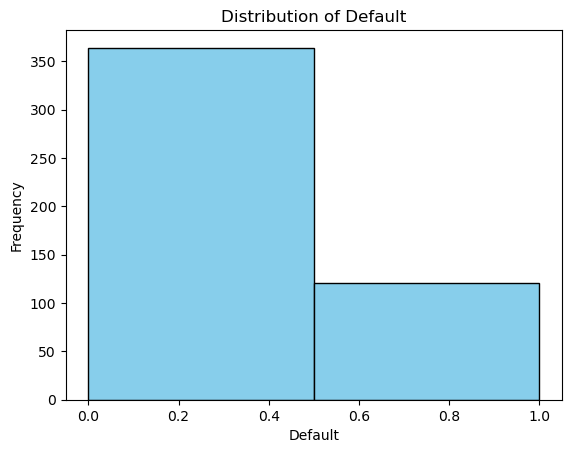

In [103]:
# Plot a histogram of the target variable
plt.hist(df['default'], bins=2, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Default')
plt.ylabel('Frequency')
plt.title('Distribution of Default')

# Show the plot
plt.show()

In [105]:
# Assuming 'df' is the DataFrame containing your data
# Assuming 'default' is the column you want to analyze

# Calculate the proportion of values less than 0.5
proportion_less_than_0_5 = (df['default'] < 0.5).mean()

# Calculate the proportion of values between 0.5 and 1
proportion_between_0_5_and_1 = ((df['default'] >= 0.5) & (df['default'] <= 1)).mean()

print("Proportion of values less than 0.5:", proportion_less_than_0_5)
print("Proportion of values between 0.5 and 1:", proportion_between_0_5_and_1)

Proportion of values less than 0.5: 0.7505154639175258
Proportion of values between 0.5 and 1: 0.24948453608247423


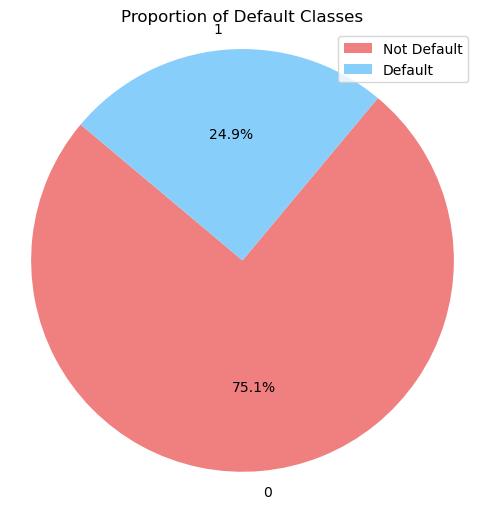

In [107]:
# Calculate the counts of each class
class_counts = df['default'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(['Not Default', 'Default'], loc='upper right')

# Add a title
plt.title('Proportion of Default Classes')

# Show the plot
plt.show()

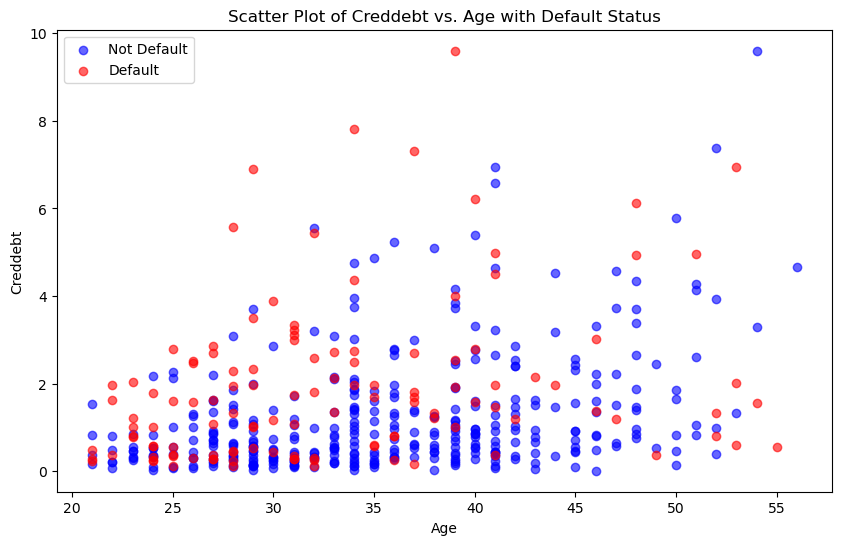

In [109]:
# Separate the data based on the 'default' status
default_0 = df[df['default'] == 0]
default_1 = df[df['default'] == 1]

# Create a scatter plot with creddebt
plt.figure(figsize=(10, 6))
plt.scatter(default_0['age'], default_0['creddebt'], color='blue', label='Not Default', alpha=0.6)
plt.scatter(default_1['age'], default_1['creddebt'], color='red', label='Default', alpha=0.6)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Creddebt')
plt.title('Scatter Plot of Creddebt vs. Age with Default Status')
plt.legend()

# Show the plot
plt.show()

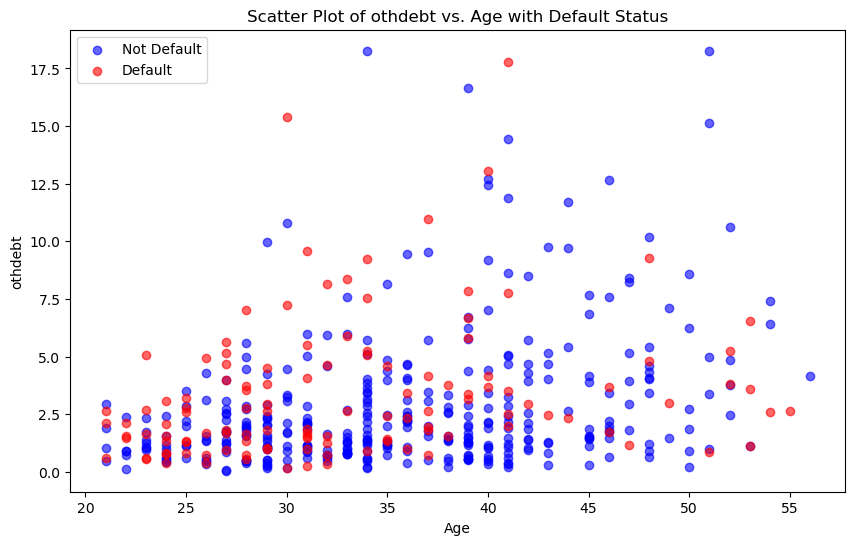

In [111]:
# Create a scatter plot with creddebt
plt.figure(figsize=(10, 6))
plt.scatter(default_0['age'], default_0['othdebt'], color='blue', label='Not Default', alpha=0.6)
plt.scatter(default_1['age'], default_1['othdebt'], color='red', label='Default', alpha=0.6)
# Add labels and title
plt.xlabel('Age')
plt.ylabel('othdebt')
plt.title('Scatter Plot of othdebt vs. Age with Default Status')
plt.legend()

# Show the plot
plt.show()

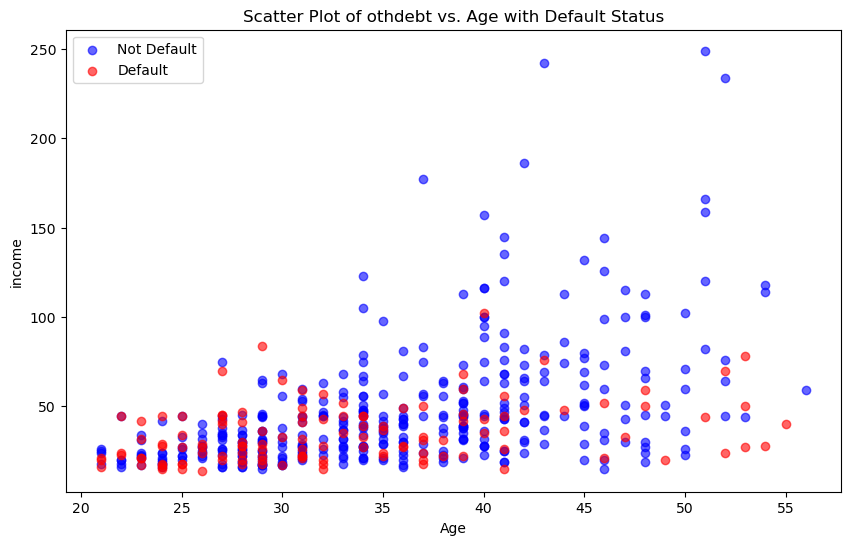

In [113]:
# Create a scatter plot with creddebt
plt.figure(figsize=(10, 6))
plt.scatter(default_0['age'], default_0['income'], color='blue', label='Not Default', alpha=0.6)
plt.scatter(default_1['age'], default_1['income'], color='red', label='Default', alpha=0.6)
# Add labels and title
plt.xlabel('Age')
plt.ylabel('income')
plt.title('Scatter Plot of othdebt vs. Age with Default Status')
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


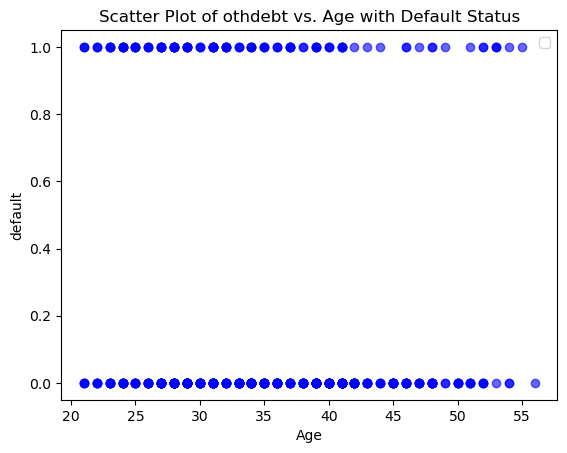

In [115]:
plt.scatter(df['age'], df['default'], color='blue', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('default')
plt.title('Scatter Plot of othdebt vs. Age with Default Status')
plt.legend()

# Show the plot
plt.show()

In [117]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)


               age    employ   address    income   debtinc  creddebt  \
age       1.000000  0.522065  0.580473  0.473166 -0.009655  0.307004   
employ    0.522065  1.000000  0.328768  0.649795 -0.106492  0.358306   
address   0.580473  0.328768  1.000000  0.338941 -0.002245  0.239019   
income    0.473166  0.649795  0.338941  1.000000 -0.090071  0.434612   
debtinc  -0.009655 -0.106492 -0.002245 -0.090071  1.000000  0.541968   
creddebt  0.307004  0.358306  0.239019  0.434612  0.541968  1.000000   
othdebt   0.292730  0.386758  0.213958  0.553192  0.588518  0.568523   
ed       -0.018579 -0.154118 -0.000270  0.219402  0.042811  0.095287   
default  -0.135581 -0.312735 -0.163656 -0.177143  0.400194  0.200298   

           othdebt        ed   default  
age       0.292730 -0.018579 -0.135581  
employ    0.386758 -0.154118 -0.312735  
address   0.213958 -0.000270 -0.163656  
income    0.553192  0.219402 -0.177143  
debtinc   0.588518  0.042811  0.400194  
creddebt  0.568523  0.095287  0.2

In [160]:
# Features (X) and Target (y)
X = df.drop(columns=['default'])
y = df['default']

In [182]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (388, 8)
X_test shape: (97, 8)
y_train shape: (388,)
y_test shape: (97,)


In [141]:
df.shape


(485, 9)

In [164]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
# Print the distribution of the target variable in the training set
print("Before SMOTE - y_train distribution:")
print(y_train.value_counts())

Before SMOTE - y_train distribution:
default
0    294
1     94
Name: count, dtype: int64


In [128]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the distribution of the target variable in the resampled training set
print("After SMOTE - y_train_resampled distribution:")
print(y_train_resampled.value_counts())

After SMOTE - y_train_resampled distribution:
default
1    294
0    294
Name: count, dtype: int64


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## Regression Model

In [184]:
# Train the model
log_model = LogisticRegression(random_state=50, max_iter=1000)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=50)

In [186]:
# Make predictions
log_y_pred = model.predict(X_test_scaled)
log_y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7525773195876289
Precision: 0.5555555555555556
Recall: 0.5555555555555556
F1 Score: 0.5555555555555556
ROC AUC Score: 0.8386243386243386
Confusion Matrix:
 [[58 12]
 [12 15]]


/Users/nazishkhan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/nazishkhan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


For this use case, recall is supposed to be a good measure as here, it is crucial to identify the true defaults (actual positives).
In Logistic Regression, we aee getting Accuracy 73% and Recall as 77%. 

In [135]:
# Scale the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [137]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled_scaled, y_train_resampled)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

# Evaluate the model on the test set with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("\nEvaluation Metrics on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC Score: 0.92684226688724

Evaluation Metrics on Test Set:
Accuracy: 0.7525773195876289
Precision: 0.5555555555555556
Recall: 0.5555555555555556
F1 Score: 0.5555555555555556
ROC AUC Score: 0.8386243386243386
Confusion Matrix:
 [[58 12]
 [12 15]]
